# Tutorial for using the new analysis API

This file outlines the various analysis API defined in the latest iteratation of the CAMAC software base. The flow of the program is as follows:
1. Recorded data file is stored as .bin
2. The .bin is processed by sas_analysis.py file to create .ftr file
3. The following script is then used to read the .ftr file and create analysis plots

In [1]:
# Needed libraries
import feather
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import andrews_curves
import sys
from MuonDataFrame import *

## Dataframe 

The following are the query terms *(strings)* for the dataframe: `'event_num', 'event_time', 'deadtime', 'TDC_L1_L', 'TDC_L1_R','TDC_L2_L', 'TDC_L2_R', 'ADC', 'TDC' , 'numChannelsRead', 'L1_asym','L2_asym', 'L1_TDC_sum', 'L2_TDC_sum', 'L1_TDC_diff', 'L2_TDC_diff'`

The following cell shows how to instantiate a MuonDataFrame object

In [2]:
# variable storing the path to .ftr file
ifile = "processed_data/events_data_frame_510.ftr"

# pass on the path to the MuonDataFrame object
mdf = MuonDataFrame(ifile)

## MuonDataFrame Methods

The following cell blocks explains the various methods accessible to the MuonDataFrame object

### Displaying the data frame
`MuonDataFrameObject.show()`

In [4]:
mdf.show()

,event_num,event_time,deadtime,TDC_L1_L,TDC_L1_R,TDC_L2_L,TDC_L2_R,ADC,TDC,numChannelsRead,L1_asym,L2_asym,L1_TDC_sum,L2_TDC_sum,L1_TDC_diff,L2_TDC_diff,TDC_hit_num
0,0,2020-09-11 14:52:20.935820,931,NaN,NaN,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]",None,0,NaN,NaN,NaN,NaN,NaN,NaN,"[0, 0, 0, 0]"
1,1,2020-09-11 14:52:21.025908,1159,142.0,111.0,136.0,106.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 142], [1, 111], [3, 21], [3, 136], [4, 25...",4,12.252964,12.396694,253.0,242.0,31.0,30.0,"[1, 1, 2, 2]"
2,2,2020-09-11 14:52:21.145883,1205,113.0,124.0,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 9, 18, 18, 24]","[[0, 113], [1, 124]]",2,-4.641350,NaN,237.0,NaN,-11.0,NaN,"[1, 1, 0, 0]"
3,3,2020-09-11 14:52:21.326215,964,139.0,114.0,132.0,114.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 139], [1, 114], [3, 132], [4, 114]]",4,9.881423,7.317073,253.0,246.0,25.0,18.0,"[1, 1, 1, 1]"
4,4,2020-09-11 14:52:21.425936,1134,NaN,NaN,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]",None,0,NaN,NaN,NaN,NaN,NaN,NaN,"[0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,2020-09-11 14:54:07.257322,569,154.0,111.0,136.0,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 154], [1, 111], [3, 136]]",3,16.226415,NaN,265.0,NaN,43.0,NaN,"[1, 1, 1, 0]"
996,996,2020-09-11 14:54:07.337286,938,148.0,110.0,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 148], [1, 110]]",2,14.728682,NaN,258.0,NaN,38.0,NaN,"[1, 1, 0, 0]"
997,997,2020-09-11 14:54:07.447403,1069,NaN,145.0,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 9, 18, 18, 24]","[[1, 145]]",1,NaN,NaN,NaN,NaN,NaN,NaN,"[0, 1, 0, 0]"
998,998,2020-09-11 14:54:07.547309,736,111.0,118.0,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 111], [1, 118]]",2,-3.056769,NaN,229.0,NaN,-7.0,NaN,"[1, 1, 0, 0]"


### Displaying the data frame summary
`MuonDataFrameObject.summary()`

In [5]:
mdf.summary()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   event_num        1000 non-null   int64         
 1   event_time       1000 non-null   datetime64[ns]
 2   deadtime         1000 non-null   int64         
 3   TDC_L1_L         623 non-null    float64       
 4   TDC_L1_R         644 non-null    float64       
 5   TDC_L2_L         394 non-null    float64       
 6   TDC_L2_R         404 non-null    float64       
 7   ADC              1000 non-null   object        
 8   TDC              743 non-null    object        
 9   numChannelsRead  1000 non-null   int64         
 10  L1_asym          585 non-null    float64       
 11  L2_asym          356 non-null    float64       
 12  L1_TDC_sum       585 non-null    float64       
 13  L2_TDC_sum       356 non-null    float64       
 14  L1_TDC_diff      585 non-null    float64 

## Data Filtering Methods

### Displaying the information contained in a particular query term
`MuonDataFrameObject.lookAt(queryTerm)`

The following cell shows the example for the *TDC* term

In [6]:
mdf.lookAt('TDC')

0                                                   None
1      [[0, 142], [1, 111], [3, 21], [3, 136], [4, 25...
2                                   [[0, 113], [1, 124]]
3               [[0, 139], [1, 114], [3, 132], [4, 114]]
4                                                   None
                             ...                        
995                       [[0, 154], [1, 111], [3, 136]]
996                                 [[0, 148], [1, 110]]
997                                           [[1, 145]]
998                                 [[0, 111], [1, 118]]
999                                                 None
Name: TDC, Length: 1000, dtype: object

### Displaying the sumarry of the information contained in a particular query term
`MuonDataFrameObject.getStats(queryTerm)`

The following cell shows the example for the *deadtime* term

In [8]:
mdf.getStats("deadtime")

count    1000.000000
mean      976.118000
std       610.428824
min       357.000000
25%       575.500000
50%       891.000000
75%      1094.750000
max      3508.000000
Name: deadtime, dtype: float64

### Displaying the information contained in a particular event/events

`MuonDataFrameObject.getEventInfo([begin_event_num, end_event_num])` or `MuonDataFrameObject.getEventInfo(event_num)`



In [9]:
mdf.getEventInfo(833)

,event_num,event_time,deadtime,TDC_L1_L,TDC_L1_R,TDC_L2_L,TDC_L2_R,ADC,TDC,numChannelsRead,L1_asym,L2_asym,L1_TDC_sum,L2_TDC_sum,L1_TDC_diff,L2_TDC_diff,TDC_hit_num
833,833,2020-09-11 14:53:51.455357,896,126.0,119.0,108.0,129.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 126], [1, 119], [3, 108], [4, 129]]",4,2.857143,-8.860759,245.0,237.0,7.0,-21.0,"[1, 1, 1, 1]"


In [10]:
mdf.getEventInfo([10,20])

,event_num,event_time,deadtime,TDC_L1_L,TDC_L1_R,TDC_L2_L,TDC_L2_R,ADC,TDC,numChannelsRead,L1_asym,L2_asym,L1_TDC_sum,L2_TDC_sum,L1_TDC_diff,L2_TDC_diff,TDC_hit_num
10,10,2020-09-11 14:52:21.965985,877,122.0,NaN,141.0,111.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 122], [3, 141], [4, 111]]",3,NaN,11.904762,NaN,252.0,NaN,30.0,"[1, 0, 1, 1]"
11,11,2020-09-11 14:52:22.066039,799,139.0,116.0,122.0,137.0,"[57, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 139], [1, 116], [3, 122], [4, 137]]",4,9.019608,-5.791506,255.0,259.0,23.0,-15.0,"[1, 1, 1, 1]"
12,12,2020-09-11 14:52:22.145974,941,144.0,102.0,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 9, 18, 18, 24]","[[0, 144], [1, 102]]",2,17.073171,NaN,246.0,NaN,42.0,NaN,"[1, 1, 0, 0]"
13,13,2020-09-11 14:52:22.246417,975,NaN,NaN,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]",None,0,NaN,NaN,NaN,NaN,NaN,NaN,"[0, 0, 0, 0]"
14,14,2020-09-11 14:52:22.356077,758,NaN,NaN,120.0,151.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[3, 120], [4, 151]]",2,NaN,-11.439114,NaN,271.0,NaN,-31.0,"[0, 0, 1, 1]"
15,15,2020-09-11 14:52:22.435789,935,NaN,126.0,103.0,140.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[1, 126], [3, 103], [4, 140]]",3,NaN,-15.226337,NaN,243.0,NaN,-37.0,"[0, 1, 1, 1]"
16,16,2020-09-11 14:52:22.546268,974,NaN,NaN,NaN,NaN,"[115, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]",None,0,NaN,NaN,NaN,NaN,NaN,NaN,"[0, 0, 0, 0]"
17,17,2020-09-11 14:52:22.666277,943,NaN,NaN,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]",None,0,NaN,NaN,NaN,NaN,NaN,NaN,"[0, 0, 0, 0]"
18,18,2020-09-11 14:52:22.766162,917,NaN,NaN,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]",None,0,NaN,NaN,NaN,NaN,NaN,NaN,"[0, 0, 0, 0]"
19,19,2020-09-11 14:52:22.877082,490,122.0,100.0,94.0,132.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 122], [1, 100], [3, 94], [4, 132]]",4,9.909910,-16.814159,222.0,226.0,22.0,-38.0,"[1, 1, 1, 1]"


### Displaying the filtered events (single filter)
`MuonDataFrameObject.getFilteredEvents("query_term operator value")`

The following cell shows the example for the filter - *deadtime > 900*

In [13]:
filtered_mdf = mdf.getFilteredEvents(["deadtime > 1000"])
filtered_mdf

,event_num,event_time,deadtime,TDC_L1_L,TDC_L1_R,TDC_L2_L,TDC_L2_R,ADC,TDC,numChannelsRead,L1_asym,L2_asym,L1_TDC_sum,L2_TDC_sum,L1_TDC_diff,L2_TDC_diff
1,1,2020-09-11 14:52:21.025908,1159,142.0,111.0,136.0,106.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 142], [1, 111], [3, 21], [3, 136], [4, 25...",4,12.252964,12.396694,253.0,242.0,31.0,30.0
2,2,2020-09-11 14:52:21.145883,1205,113.0,124.0,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 9, 18, 18, 24]","[[0, 113], [1, 124]]",2,-4.641350,NaN,237.0,NaN,-11.0,NaN
4,4,2020-09-11 14:52:21.425936,1134,NaN,NaN,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]",None,0,NaN,NaN,NaN,NaN,NaN,NaN
23,23,2020-09-11 14:52:23.156200,1216,98.0,117.0,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 98], [1, 117]]",2,-8.837209,NaN,215.0,NaN,-19.0,NaN
24,24,2020-09-11 14:52:23.296362,1217,NaN,NaN,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]",None,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,974,2020-09-11 14:54:05.420037,1199,NaN,NaN,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]",None,0,NaN,NaN,NaN,NaN,NaN,NaN
975,975,2020-09-11 14:54:05.547073,1195,105.0,157.0,122.0,152.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 105], [1, 157], [3, 122], [4, 152]]",4,-19.847328,-10.948905,262.0,274.0,-52.0,-30.0
989,989,2020-09-11 14:54:06.637918,1025,NaN,NaN,134.0,156.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[3, 134], [4, 156]]",2,NaN,-7.586207,NaN,290.0,NaN,-22.0
994,994,2020-09-11 14:54:07.127649,1231,NaN,NaN,118.0,130.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[3, 118], [4, 130]]",2,NaN,-4.838710,NaN,248.0,NaN,-12.0


### Displaying the filtered events (multiple filters)
`MuonDataFrameObject.getFilteredEvents(["query_term operator value","query_term operator value","and/or operator" ])`

The following cell shows the example for the filters - *L1_TDC_sum > 250* and *deadtime > 900*

In [11]:
filtered_mdf = mdf.getFilteredEvents(["L1_TDC_sum > 250", "deadtime > 900", "&"])
filtered_mdf

,event_num,event_time,deadtime,TDC_L1_L,TDC_L1_R,TDC_L2_L,TDC_L2_R,ADC,TDC,numChannelsRead,L1_asym,L2_asym,L1_TDC_sum,L2_TDC_sum,L1_TDC_diff,L2_TDC_diff,TDC_hit_num
0,1,2020-09-11 14:52:21.025908,1159,142.0,111.0,136.0,106.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 142], [1, 111], [3, 21], [3, 136], [4, 25...",4,12.252964,12.396694,253.0,242.0,31.0,30.0,"[1, 1, 2, 2]"
1,3,2020-09-11 14:52:21.326215,964,139.0,114.0,132.0,114.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 139], [1, 114], [3, 132], [4, 114]]",4,9.881423,7.317073,253.0,246.0,25.0,18.0,"[1, 1, 1, 1]"
2,22,2020-09-11 14:52:23.056082,951,106.0,157.0,140.0,142.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 106], [1, 157], [3, 140], [4, 142]]",4,-19.391635,-0.709220,263.0,282.0,-51.0,-2.0,"[1, 1, 1, 1]"
3,28,2020-09-11 14:52:23.676251,1088,132.0,131.0,137.0,114.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 132], [1, 131], [3, 137], [4, 114]]",4,0.380228,9.163347,263.0,251.0,1.0,23.0,"[1, 1, 1, 1]"
4,31,2020-09-11 14:52:24.006211,1234,115.0,143.0,140.0,113.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 115], [1, 143], [3, 140], [4, 113]]",4,-10.852713,10.671937,258.0,253.0,-28.0,27.0,"[1, 1, 1, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,968,2020-09-11 14:54:04.774005,1265,137.0,133.0,142.0,113.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 137], [1, 133], [3, 142], [4, 113]]",4,1.481481,11.372549,270.0,255.0,4.0,29.0,"[1, 1, 1, 1]"
155,975,2020-09-11 14:54:05.547073,1195,105.0,157.0,122.0,152.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 105], [1, 157], [3, 122], [4, 152]]",4,-19.847328,-10.948905,262.0,274.0,-52.0,-30.0,"[1, 1, 1, 1]"
156,979,2020-09-11 14:54:05.876769,979,128.0,128.0,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 128], [1, 128]]",2,0.000000,NaN,256.0,NaN,0.0,NaN,"[1, 1, 0, 0]"
157,986,2020-09-11 14:54:06.436858,986,147.0,113.0,140.0,110.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 147], [1, 113], [3, 140], [4, 110]]",4,13.076923,12.000000,260.0,250.0,34.0,30.0,"[1, 1, 1, 1]"


The following cell shows the example for the filters - *L1_TDC_sum > 250* or *deadtime > 900*

In [3]:
filtered_mdf = mdf.getFilteredEvents(["L1_TDC_sum > 250", "deadtime > 900", "|"])
filtered_mdf

,event_num,event_time,deadtime,TDC_L1_L,TDC_L1_R,TDC_L2_L,TDC_L2_R,ADC,TDC,numChannelsRead,L1_asym,L2_asym,L1_TDC_sum,L2_TDC_sum,L1_TDC_diff,L2_TDC_diff
1,1,2020-09-11 14:52:21.025908,1159,142.0,111.0,136.0,106.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 142], [1, 111], [3, 21], [3, 136], [4, 25...",4,12.252964,12.396694,253.0,242.0,31.0,30.0
3,3,2020-09-11 14:52:21.326215,964,139.0,114.0,132.0,114.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 139], [1, 114], [3, 132], [4, 114]]",4,9.881423,7.317073,253.0,246.0,25.0,18.0
6,6,2020-09-11 14:52:21.602750,410,151.0,108.0,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 151], [1, 108]]",2,16.602317,NaN,259.0,NaN,43.0,NaN
11,11,2020-09-11 14:52:22.066039,799,139.0,116.0,122.0,137.0,"[57, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 139], [1, 116], [3, 122], [4, 137]]",4,9.019608,-5.791506,255.0,259.0,23.0,-15.0
22,22,2020-09-11 14:52:23.056082,951,106.0,157.0,140.0,142.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 106], [1, 157], [3, 140], [4, 142]]",4,-19.391635,-0.709220,263.0,282.0,-51.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,986,2020-09-11 14:54:06.436858,986,147.0,113.0,140.0,110.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 147], [1, 113], [3, 140], [4, 110]]",4,13.076923,12.000000,260.0,250.0,34.0,30.0
989,989,2020-09-11 14:54:06.637918,1025,NaN,NaN,134.0,156.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[3, 134], [4, 156]]",2,NaN,-7.586207,NaN,290.0,NaN,-22.0
994,994,2020-09-11 14:54:07.127649,1231,NaN,NaN,118.0,130.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[3, 118], [4, 130]]",2,NaN,-4.838710,NaN,248.0,NaN,-12.0
996,996,2020-09-11 14:54:07.337286,938,148.0,110.0,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 148], [1, 110]]",2,14.728682,NaN,258.0,NaN,38.0,NaN


### Using the filtered data events to plot analysis graphs

The following example shows how to plot the histogram for "L1_TDC_SUM" for the filtered events.

<AxesSubplot:ylabel='Frequency'>

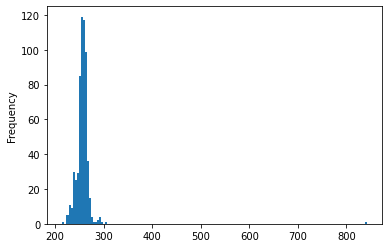

In [4]:
filtered_mdf["L1_TDC_sum"].plot.hist(bins=150)

## Method to remove outliers from data frame

`MuonDataFrameObject.removeOutliers()`

This method removes any event that is in the 1th and 99th percentile. An example of usage is shown below:

In [8]:
mdf1 = MuonDataFrame(ifile)
mdf1.removeOutliers()
mdf1.events_df

,event_num,event_time,deadtime,TDC_L1_L,TDC_L1_R,TDC_L2_L,TDC_L2_R,ADC,TDC,numChannelsRead,L1_asym,L2_asym,L1_TDC_sum,L2_TDC_sum,L1_TDC_diff,L2_TDC_diff
1,1,2020-09-11 14:52:21.025908,1159,142.0,111.0,136.0,106.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 142], [1, 111], [3, 21], [3, 136], [4, 25...",4,12.252964,12.396694,253.0,242.0,31.0,30.0
3,3,2020-09-11 14:52:21.326215,964,139.0,114.0,132.0,114.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 139], [1, 114], [3, 132], [4, 114]]",4,9.881423,7.317073,253.0,246.0,25.0,18.0
7,7,2020-09-11 14:52:21.656200,900,107.0,135.0,133.0,108.0,"[1, 33, 34, 35, 31, 22, 28, 7, 9, 18, 18, 24]","[[0, 107], [1, 135], [3, 133], [4, 108]]",4,-11.570248,10.373444,242.0,241.0,-28.0,25.0
11,11,2020-09-11 14:52:22.066039,799,139.0,116.0,122.0,137.0,"[57, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 139], [1, 116], [3, 122], [4, 137]]",4,9.019608,-5.791506,255.0,259.0,23.0,-15.0
21,21,2020-09-11 14:52:22.996071,530,108.0,134.0,111.0,139.0,"[33, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 108], [1, 134], [3, 111], [4, 139]]",4,-10.743802,-11.200000,242.0,250.0,-26.0,-28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,980,2020-09-11 14:54:05.987274,540,138.0,130.0,140.0,110.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 138], [1, 130], [3, 140], [4, 110]]",4,2.985075,12.000000,268.0,250.0,8.0,30.0
984,984,2020-09-11 14:54:06.256905,990,108.0,135.0,108.0,144.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 108], [1, 135], [3, 108], [4, 144]]",4,-11.111111,-14.285714,243.0,252.0,-27.0,-36.0
986,986,2020-09-11 14:54:06.436858,986,147.0,113.0,140.0,110.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 147], [1, 113], [3, 140], [4, 110]]",4,13.076923,12.000000,260.0,250.0,34.0,30.0
988,988,2020-09-11 14:54:06.577392,440,151.0,111.0,135.0,122.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 151], [1, 111], [3, 135], [4, 122]]",4,15.267176,5.058366,262.0,257.0,40.0,13.0


## Method to remove events with no TDC values from data frame

`MuonDataFrameObject.removeNoTDCEvents()`

This method removes any event that did not register any TDC value. An example of usage is shown below:

In [9]:
mdf1 = MuonDataFrame(ifile)
mdf1.removeNoTDCEvents()
mdf1.events_df

,event_num,event_time,deadtime,TDC_L1_L,TDC_L1_R,TDC_L2_L,TDC_L2_R,ADC,TDC,numChannelsRead,L1_asym,L2_asym,L1_TDC_sum,L2_TDC_sum,L1_TDC_diff,L2_TDC_diff
1,1,2020-09-11 14:52:21.025908,1159,142.0,111.0,136.0,106.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 142], [1, 111], [3, 21], [3, 136], [4, 25...",4,12.252964,12.396694,253.0,242.0,31.0,30.0
2,2,2020-09-11 14:52:21.145883,1205,113.0,124.0,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 9, 18, 18, 24]","[[0, 113], [1, 124]]",2,-4.641350,NaN,237.0,NaN,-11.0,NaN
3,3,2020-09-11 14:52:21.326215,964,139.0,114.0,132.0,114.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 139], [1, 114], [3, 132], [4, 114]]",4,9.881423,7.317073,253.0,246.0,25.0,18.0
6,6,2020-09-11 14:52:21.602750,410,151.0,108.0,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 151], [1, 108]]",2,16.602317,NaN,259.0,NaN,43.0,NaN
7,7,2020-09-11 14:52:21.656200,900,107.0,135.0,133.0,108.0,"[1, 33, 34, 35, 31, 22, 28, 7, 9, 18, 18, 24]","[[0, 107], [1, 135], [3, 133], [4, 108]]",4,-11.570248,10.373444,242.0,241.0,-28.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,2020-09-11 14:54:07.127649,1231,NaN,NaN,118.0,130.0,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[3, 118], [4, 130]]",2,NaN,-4.838710,NaN,248.0,NaN,-12.0
995,995,2020-09-11 14:54:07.257322,569,154.0,111.0,136.0,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 154], [1, 111], [3, 136]]",3,16.226415,NaN,265.0,NaN,43.0,NaN
996,996,2020-09-11 14:54:07.337286,938,148.0,110.0,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]","[[0, 148], [1, 110]]",2,14.728682,NaN,258.0,NaN,38.0,NaN
997,997,2020-09-11 14:54:07.447403,1069,NaN,145.0,NaN,NaN,"[1, 33, 34, 35, 31, 22, 28, 7, 9, 18, 18, 24]","[[1, 145]]",1,NaN,NaN,NaN,NaN,NaN,NaN


## Data Plotting Methods

### Plotting 1 D histogram
`MuonDataFrameObject.getHistogram(query_term)`

The following example shows how to plot the histogram for *L1_TDC_sum*

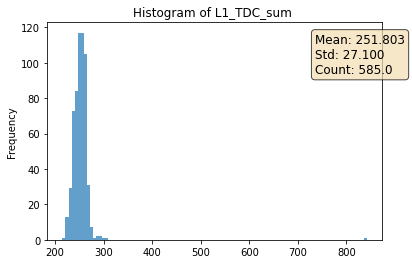

In [5]:
mdf.getHistogram("L1_TDC_sum")

### Plotting Kernel Density Estimation (KDE) graph
`MuonDataFrameObject.getKDE(query_term)`

The following example shows how to plot the histogram for *L1_TDC_sum*

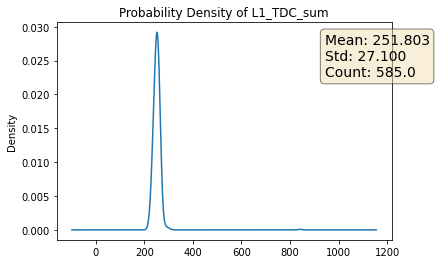

In [4]:
mdf.getKDE("L1_TDC_sum")

### Plotting Trimmed 1 D histogram
`MuonDataFrameObject.getTrimmedHistogram(query_term, num_std_dev)`


The following example shows how to plot the histogram for *L1_TDC_sum* with events within 3 standard deviations

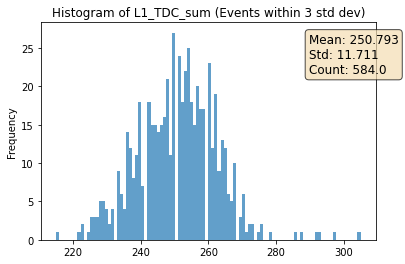

In [20]:
mdf.getTrimmedHistogram("L1_TDC_sum", 3)

### Plotting Comparable 1 D histograms
`MuonDataFrameObject.getComparableHistogram([query_term1, query_term2])`


The following example shows how to plot two comparable histograms for *L1_TDC_sum* and *L2_TDC_sum*

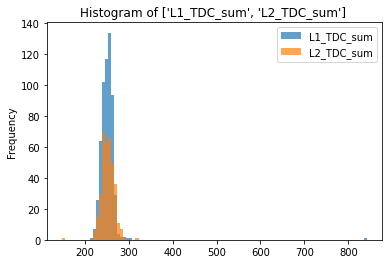

In [4]:
mdf.getComparableHistogram(["L1_TDC_sum", "L2_TDC_sum"])

### Plotting Trimmed Comparable 1 D histograms
`MuonDataFrameObject.getTrimmedComparableHistogram([query_term1, query_term2], num_std_dev)`

The following example shows how to plot two comparable histograms for *L1_TDC_sum* and *L2_TDC_sum* with events with 3 standard deviations 

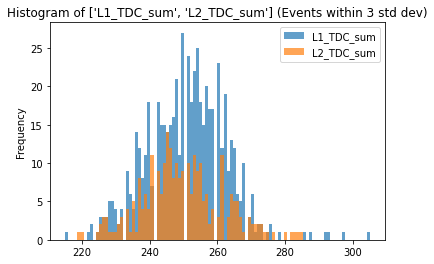

In [15]:
mdf.getTrimmedComparableHistogram(["L1_TDC_sum", "L2_TDC_sum"], 3)

### Plotting Filtered 1 D histograms
`MuonDataFrameObject.getFilteredHistogram([query_term1, query_term2])`

The following example shows how to plot histograms for *L1_TDC_sum* against different values of *numChannelsRead*

<IPython.core.display.Javascript object>


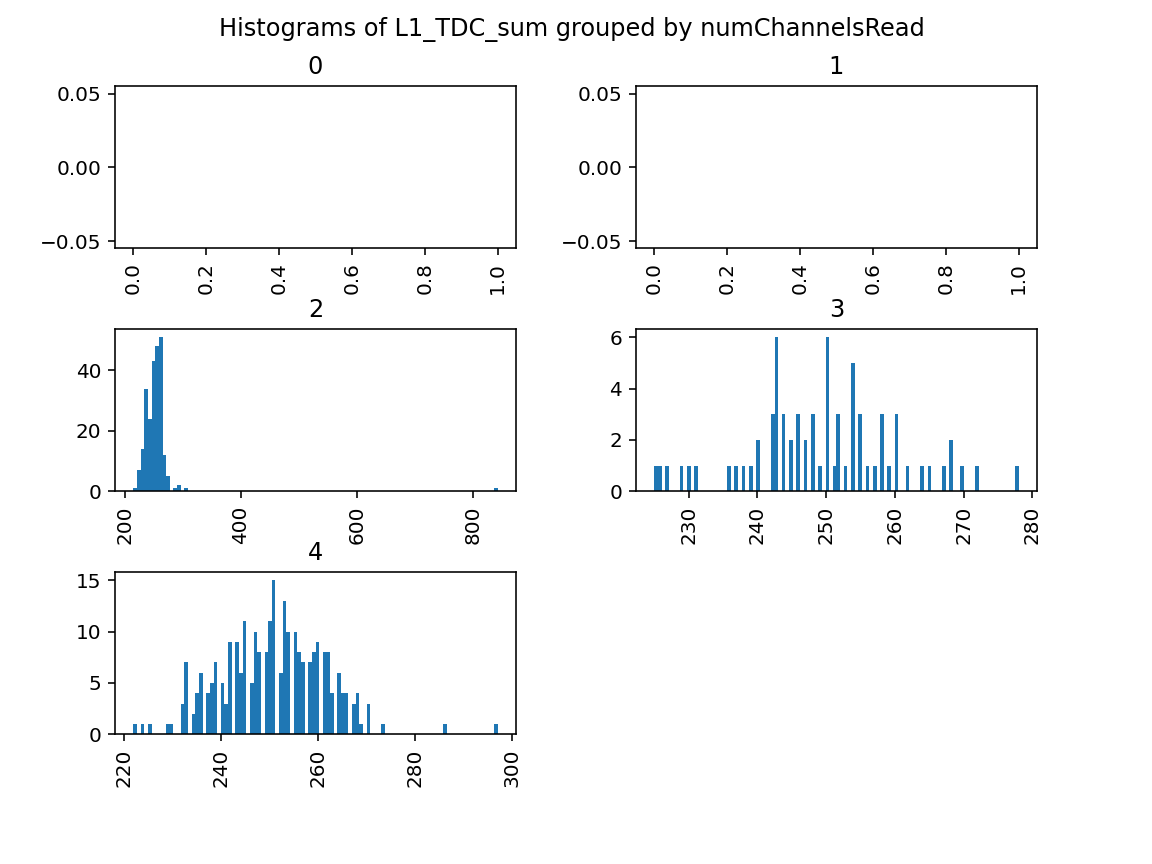

In [28]:
plt.rcParams['figure.figsize'] = [8, 6]
mdf.getFilteredHistogram("L1_TDC_sum", "numChannelsRead")

### Plotting Time Series Plots
`MuonDataFrameObject.getPlot(query_term)`

The following example shows how to plot time series plots of *deadtime*

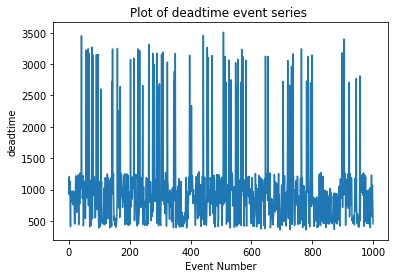

In [8]:
mdf.getPlot("deadtime")

### Plotting Time Scatter Plots
`MuonDataFrameObject.getScatterPlot([query_term1, query_term2])`

The following example shows how to plot time scatter plot of *L1_asym* against *L2_asym*

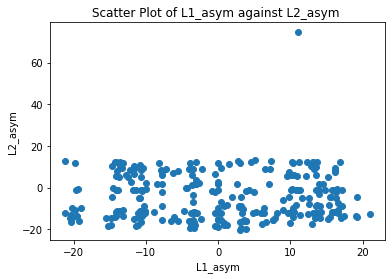

In [9]:
mdf.getScatterPlot(["L1_asym", "L2_asym"])

### Plotting Time Scatter Plots
`MuonDataFrameObject.get3DScatterPlot([query_term1, query_term2, query_term3])`

The following example shows how to plot time scatter plot of *L1_asym* against *L2_asym* with the color axis representing *L1_TDC_sum*

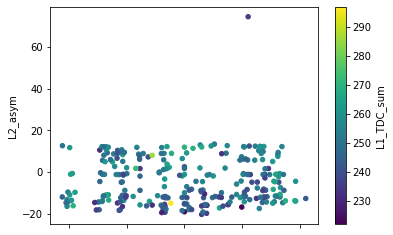

In [11]:
mdf.get3DScatterPlot(["L1_asym", "L2_asym", "L1_TDC_sum"])

### Generating Histogram of Multiple TDC Hits
`MuonDataFrameObject.getMultipleTDCHitReport()`


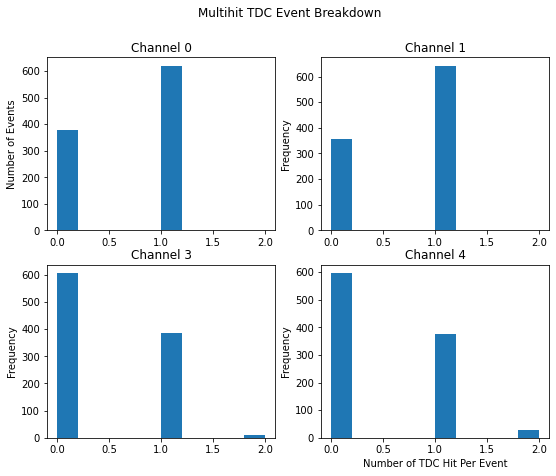

In [3]:
mdf.getMultipleTDCHitReport()

## TO DO LIST

- implement methods that updates all TDC columns using some TDC value
    - first TDC
    - max TDC
    - min TDC
- generate report method
- any more data filtering method
- implement Igor 2D histo
- Bell curve fit of histo
- Recreate of all graphs
- Plots of arrays from columns